In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import spatialdata as sd
import spatialdata_plot
import matplotlib.pyplot as plt
import pandas as pd
from typing import Union

/home/voehring/voehring/projects/2023-01-15_spatial_data/spatialdata-env/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/voehring/voehring/projects/2023-01-15_spatial_data/spatialdata-env/lib/python3.9/site-packages/spatialdata/_compat.py:18: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  warnings.warn(


## Load data 

In [3]:
data_dir = "/Users/tim.treis/Documents/GitHub/spatialdata-sandbox/"

mibi = sd.read_zarr(data_dir  + "mibitof/data.zarr")
merfish = sd.read_zarr(data_dir  + "merfish/data.zarr")
visium = sd.read_zarr(data_dir  + "visium/data.zarr")

no parent found for <ome_zarr.reader.Label object at 0x16a03acb0>: None
no parent found for <ome_zarr.reader.Label object at 0x16a0504f0>: None
no parent found for <ome_zarr.reader.Label object at 0x16a052290>: None
/Users/tim.treis/anaconda3/envs/spatialdata/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
mibi.pp.get_region_key()

'library_id'

In [ ]:
mibitof

NameError: name 'mibitof' is not defined

In [ ]:
merfish

SpatialData object with:
├── Images
│     └── 'rasterized': SpatialImage[cyx] (1, 522, 575)
├── Points
│     └── 'single_molecule': pyarrow.Table shape: (3714642, 3) (2D points)
├── Polygons
│     └── 'anatomical': GeoDataFrame shape: (6, 1) (2D polygons)
├── Shapes
│     └── 'cells': AnnData with osbm.spatial (2399, 2)
└── Table
      └── AnnData object with n_obs × n_vars = 2399 × 268
    obs: 'cell_id'
    uns: 'spatialdata_attrs': AnnData (2399, 268)

In [ ]:
visium

SpatialData object with:
├── Images
│     ├── 'ST8059050': SpatialImage[cyx] (3, 2000, 1968)
│     └── 'ST8059051': SpatialImage[cyx] (3, 2000, 1963)
├── Shapes
│     ├── 'ST8059050': AnnData with osbm.spatial (3497, 2)
│     └── 'ST8059051': AnnData with osbm.spatial (2409, 2)
└── Table
      └── AnnData object with n_obs × n_vars = 5906 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'annotating', 'library', 'visium_spot_id'
    uns: 'spatialdata_attrs': AnnData (5906, 31053)

# `spatialdata_plot`: one to visualise them all 💍

## Load data

* Codex
* IMC
* Merfish
* Mibi-TOF
* Visium

In [3]:
codex = sd.read_zarr('/home/voehring/voehring/projects/2023-01-15_spatial_data/codex_all.zarr')

KeyError: 'coordinateTransformations'

In [4]:
codex_channels = ['Hoechst', 'BCL6', 'CD103', 'Myc', 'CD39', 'pSTAT3', 'CD70', 'GATA3',
       'CXCR5', 'Tbet', 'CD62L', 'FOXP3', 'CD163', 'CD194', 'Ki67', 'TIM3',
       'PAX5', 'CD134', 'IL10', 'CD5', 'CD206', 'CD25', 'CD16', 'CTLA4',
       'CD79a', 'CD57', 'CD34', 'CXCL13', 'CD21', 'CD7', 'PDPN', 'PD1',
       'HLA-DR', 'LAG3', 'CD20', 'CD56', 'CD45RO', 'ICOS', 'CD90', 'CD4',
       'CD11c', 'CD3', 'CD68', 'CD69', 'CD14', 'CD8', 'kappa', 'CD45RA',
       'CD11b', 'GRZB', 'CD31', 'CD45', 'CD38', 'CD44', 'CD15', 'lambda',
       'MCT', 'DRAQ5']

In [5]:
imc = sd.read_zarr('/home/voehring/voehring/projects/2023-01-15_spatial_data/stein_new.zarr')

KeyError: 'coordinateTransformations'

* paths for harald 

In [107]:
data_dir = "/home/voehring/voehring/projects/2023-01-15_spatial_data/"

mibi = sd.read_zarr(data_dir  + "mibi-new.zarr")

In [134]:
merfish = sd.read_zarr(data_dir  + "merfish-new.zarr")

/g/huber/users/voehring/projects/2023-01-15_spatial_data/spatialdata-plot/src/spatialdata_plot/tl/basic.py:10: AccessorRegistrationWarning: registration of accessor <class 'spatialdata_plot.tl.basic.ToolsAccessor'> under name 'tl' for type <class 'spatialdata._core._spatialdata.SpatialData'> is overriding a preexisting attribute with the same name.
  class ToolsAccessor:


In [135]:
visium = sd.read_zarr(data_dir  + "visium-new.zarr")

/home/voehring/voehring/projects/2023-01-15_spatial_data/spatialdata-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## Overview - Principles

* `spatialdata_plotting` extends `spatialdata` with extensive plotting capabilities


### Preprocessing `spatialdata_plotting.pp`


* slicing and dicing -> always returns a `spatialdata` object with the selection, should be called before plotting
    * `get_images`: select images
    * `get_channels`: select channels
    * `get_bb`: select bounding box
* rendering labels, points, polygons
    * `render_labels`: overlays the segmentation mask of an image


### Plotting `spatialdata_plotting.pl`

* implements everything related to plotting 
    * `imshow`
    * `scatter`
    * `bar`


## Slicing and dicing

### `spatialdata_plotting.pp.get_images`

* We consider the MIBI dataset which contains 3 images `point8`, `point16`, `point23`.

In [8]:
mibi

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 1024, 1024)
│     ├── 'point23': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point8': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point16': SpatialImage[yx] (1024, 1024)
│     ├── 'point23': SpatialImage[yx] (1024, 1024)
│     └── 'point8': SpatialImage[yx] (1024, 1024)
└── Table
      └── AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial': AnnData (3309, 36)

* `spatial_plotting.pp.get_image` selects a subset of images and returns a new `spatialdata` object
    * the returned `spatialdata` by default drops all labels not associated to the image selection
    * TODO: if the `label` name does not match name with the `image` a function may be provided (?)
    * TODO: `spatial_plotting.pp.get_image` should also subselect `table`, `points`, `polygons` etc.

In [13]:
mibi.pp.get_images('point16')

SpatialData object with:
├── Images
│     └── 'point16': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     └── 'point16': SpatialImage[yx] (1024, 1024)
└── Table
      └── 'View of AnnData object with n_obs × n_vars = 1023 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (1023, 36)

In [ ]:
mibi.pp.get_images(['point16', 'point23'])

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point23': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point16': SpatialImage[yx] (1024, 1024)
│     └── 'point23': SpatialImage[yx] (1024, 1024)
└── Table
      └── 'AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (3309, 36)

* in this example `label` and `image` do not match

In [ ]:
imc

SpatialData object with:
├── Images
│     ├── 'Patient1_001': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient1_002': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient1_003': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient2_001': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient2_002': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient2_003': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient2_004': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient3_001': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient3_002': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient3_003': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient4_005': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient4_006': SpatialImage[cyx] (40, 600, 600)
│     ├── 'Patient4_007': SpatialImage[cyx] (40, 600, 600)
│     └── 'Patient4_008': SpatialImage[cyx] (40, 600, 600)
├── Labels
│     ├── 'Patient1_001_deepcell': SpatialImage[yx] (600, 600)
│     ├── 'Patient1_001_ilastik': SpatialImage[yx] (600, 600)
│ 

In [ ]:
imc.pp.get_images(['Patient2_002', 'Patient2_001'])

SpatialData object with:
├── Images
│     ├── 'Patient2_001': SpatialImage[cyx] (40, 600, 600)
│     └── 'Patient2_002': SpatialImage[cyx] (40, 600, 600)
└── Table
      └── 'AnnData object with n_obs × n_vars = 47859 × 40
    obs: 'Image', 'area', 'centroid-0', 'centroid-1', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'image', 'image_width_px', 'image_height_px', 'image_num_channels', 'image_source_file', 'image_recovery_file', 'image_recovered', 'image_acquisition_id', 'image_acquisition_description', 'image_acquisition_start_x_um', 'image_acquisition_start_y_um', 'image_acquisition_end_x_um', 'image_acquisition_end_y_um', 'image_acquisition_width_um', 'image_acquisition_height_um', 'cell_id', 'library_id'
    var: 'channel', 'name', 'keep', 'ilastik', 'deepcell', 'Tube Number', 'Target', 'Antibody Clone', 'Stock Concentration', 'Final Concentration / Dilution', 'uL to add'
    uns: 'spatialdata_attrs'': AnnData (47859, 40)

### `spatialdata_plotting.pp.get_bb`
* `spatialdata_plotting.pp.get_bb` crops the desired parts of the image by iterating over all images and labels
    * TODO: How to handle out of range cases (?)


In [ ]:
mibi.pp.get_bb(slice(200, 400), slice(200, 400))

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 200, 200)
│     ├── 'point23': SpatialImage[cyx] (3, 200, 200)
│     └── 'point8': SpatialImage[cyx] (3, 200, 200)
├── Labels
│     ├── 'point16': SpatialImage[yx] (200, 200)
│     ├── 'point23': SpatialImage[yx] (200, 200)
│     └── 'point8': SpatialImage[yx] (200, 200)
└── Table
      └── 'AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (3309, 36)

### `spatialdata_plotting.pp.get_channels`
* `spatialdata_plotting.pp.get_bb` selects channels
    * TODO: How to handle out of range cases (?)

In [ ]:
imc.pp.get_channels([4, 6, 7])

SpatialData object with:
├── Images
│     ├── 'Patient1_001': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient1_002': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient1_003': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient2_001': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient2_002': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient2_003': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient2_004': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient3_001': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient3_002': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient3_003': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient4_005': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient4_006': SpatialImage[cyx] (3, 600, 600)
│     ├── 'Patient4_007': SpatialImage[cyx] (3, 600, 600)
│     └── 'Patient4_008': SpatialImage[cyx] (3, 600, 600)
├── Labels
│     ├── 'Patient1_001_deepcell': SpatialImage[yx] (600, 600)
│     ├── 'Patient1_001_ilastik': SpatialImage[yx] (600, 600)
│     ├── 'Patie

## Chaining

* `spatialdata_plotting.pp` subsetting functions (`pp.get_images`, `pp.get_channels`, `pp.get_bb`) are meant to be used in conjunction and are order invariant

In [ ]:
(mibi
 .pp.get_images(['point16', 'point8'])
 .pp.get_channels([1, 2])
 .pp.get_bb(slice(200, 400), slice(400, 600))
)

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (2, 200, 200)
│     └── 'point8': SpatialImage[cyx] (2, 200, 200)
├── Labels
│     ├── 'point16': SpatialImage[yx] (200, 200)
│     └── 'point8': SpatialImage[yx] (200, 200)
└── Table
      └── 'AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial'': AnnData (3309, 36)

In [ ]:
(codex
 .pp.get_images(['191_1_00', '191_1_01', '191_1_30'])
 .pp.get_bb(slice(1000, 1500), slice(1000, 1500))
 .pp.get_channels([4, 5, 7, 19])
)

SpatialData object with:
├── Images
│     ├── '191_1_00': SpatialImage[cyx] (4, 500, 500)
│     ├── '191_1_01': SpatialImage[cyx] (4, 500, 500)
│     └── '191_1_30': SpatialImage[cyx] (4, 500, 500)
├── Labels
│     ├── '191_1_00': SpatialImage[yx] (500, 500)
│     ├── '191_1_01': SpatialImage[yx] (500, 500)
│     └── '191_1_30': SpatialImage[yx] (500, 500)
└── Table
      └── 'AnnData object with n_obs × n_vars = 6158123 × 58
    obs: 'id', 'x', 'y', 'size', 'ellipse', 'cx', 'cy', 'major', 'minor', 'angle', 'top', 'bottom', 'left', 'right', 'border', 'cell', 'label', 'num', 'name', 'origin', 'library_id', 'color'
    uns: 'spatialdata_attrs'': AnnData (6158123, 58)

## Colorizing

* Intended to be used with raw spatial proteomics data such as CODEX, IMC etc.
    * Performs quantile normalisation and colors the image according to specified colors
    * The returned `spatialdata` object contains colorized images in the `images` slot

In [ ]:
idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

(codex
 .pp.get_images(['191_1_00', '191_1_01', '191_1_30'])
 .pp.get_bb(slice(1000, 1500), slice(1000, 1500))
 .pp.get_channels(idx)
 .pp.colorize(colors=['green', 'blue', 'red'])
)

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


SpatialData object with:
├── Images
│     ├── '191_1_00': SpatialImage[cyx] (4, 500, 500)
│     ├── '191_1_01': SpatialImage[cyx] (4, 500, 500)
│     └── '191_1_30': SpatialImage[cyx] (4, 500, 500)
├── Labels
│     ├── '191_1_00': SpatialImage[yx] (500, 500)
│     ├── '191_1_01': SpatialImage[yx] (500, 500)
│     └── '191_1_30': SpatialImage[yx] (500, 500)
└── Table
      └── 'AnnData object with n_obs × n_vars = 6158123 × 58
    obs: 'id', 'x', 'y', 'size', 'ellipse', 'cx', 'cy', 'major', 'minor', 'angle', 'top', 'bottom', 'left', 'right', 'border', 'cell', 'label', 'num', 'name', 'origin', 'library_id', 'color'
    uns: 'spatialdata_attrs'': AnnData (6158123, 58)

## Render segmentation

* overlays a segmentation mask onto a image

In [ ]:
idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

(codex
 .pp.get_images(['191_1_00', '191_1_01', '191_1_30'])
 .pp.get_bb(slice(1000, 1500), slice(1000, 1500))
 .pp.get_channels(idx)
 .pp.colorize(colors=['green', 'blue', 'red'])
 .pp.render_labels()
)

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


SpatialData object with:
├── Images
│     ├── '191_1_00': SpatialImage[cyx] (4, 500, 500)
│     ├── '191_1_01': SpatialImage[cyx] (4, 500, 500)
│     └── '191_1_30': SpatialImage[cyx] (4, 500, 500)
├── Labels
│     ├── '191_1_00': SpatialImage[yx] (500, 500)
│     ├── '191_1_01': SpatialImage[yx] (500, 500)
│     └── '191_1_30': SpatialImage[yx] (500, 500)
└── Table
      └── 'AnnData object with n_obs × n_vars = 6158123 × 58
    obs: 'id', 'x', 'y', 'size', 'ellipse', 'cx', 'cy', 'major', 'minor', 'angle', 'top', 'bottom', 'left', 'right', 'border', 'cell', 'label', 'num', 'name', 'origin', 'library_id', 'color'
    uns: 'spatialdata_attrs'': AnnData (6158123, 58)

## Plotting

* By default `splatialdata_plotting.pl.imshow`, creates a raster of all images available in the `spatialdata` object

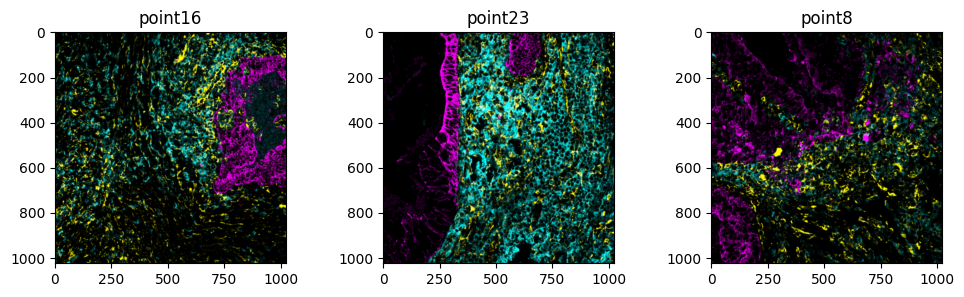

In [9]:
_ = mibi.pl.imshow()

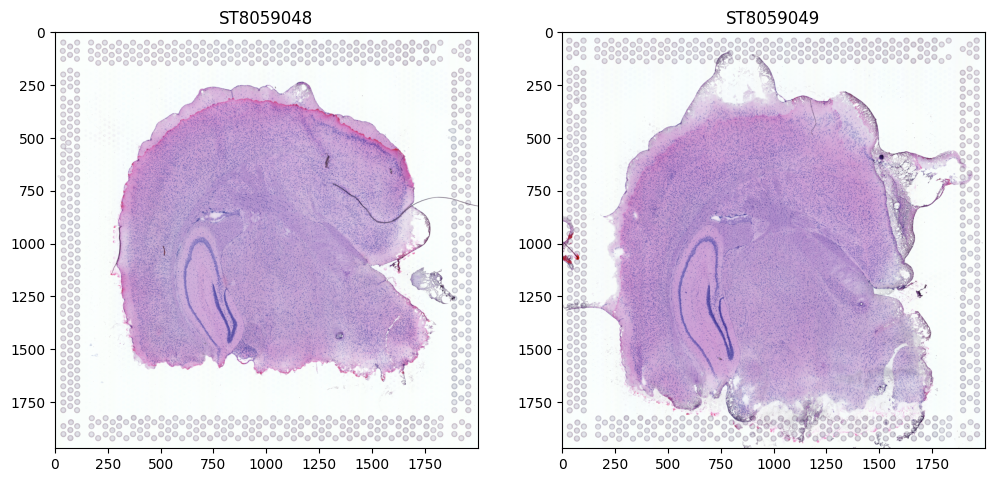

In [15]:
_ = (visium
     .pl.imshow(width=6, height=6)
     
    )

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

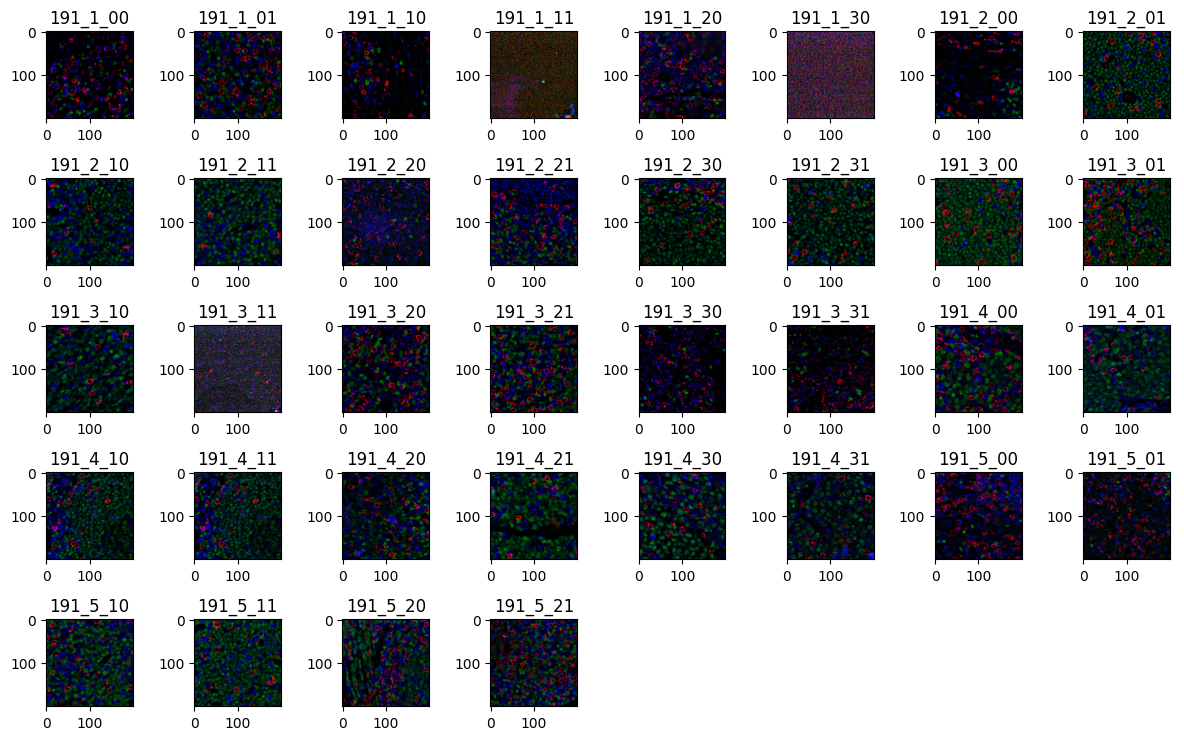

In [ ]:
idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

_ = (codex
     .pp.get_bb(slice(500, 700), slice(500, 700))
     .pp.get_channels(idx)
     .pp.colorize(colors=['green', 'blue', 'red'])
     .pl.imshow(width=1.5, height=1.5, ncols=8)
)
plt.tight_layout()

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


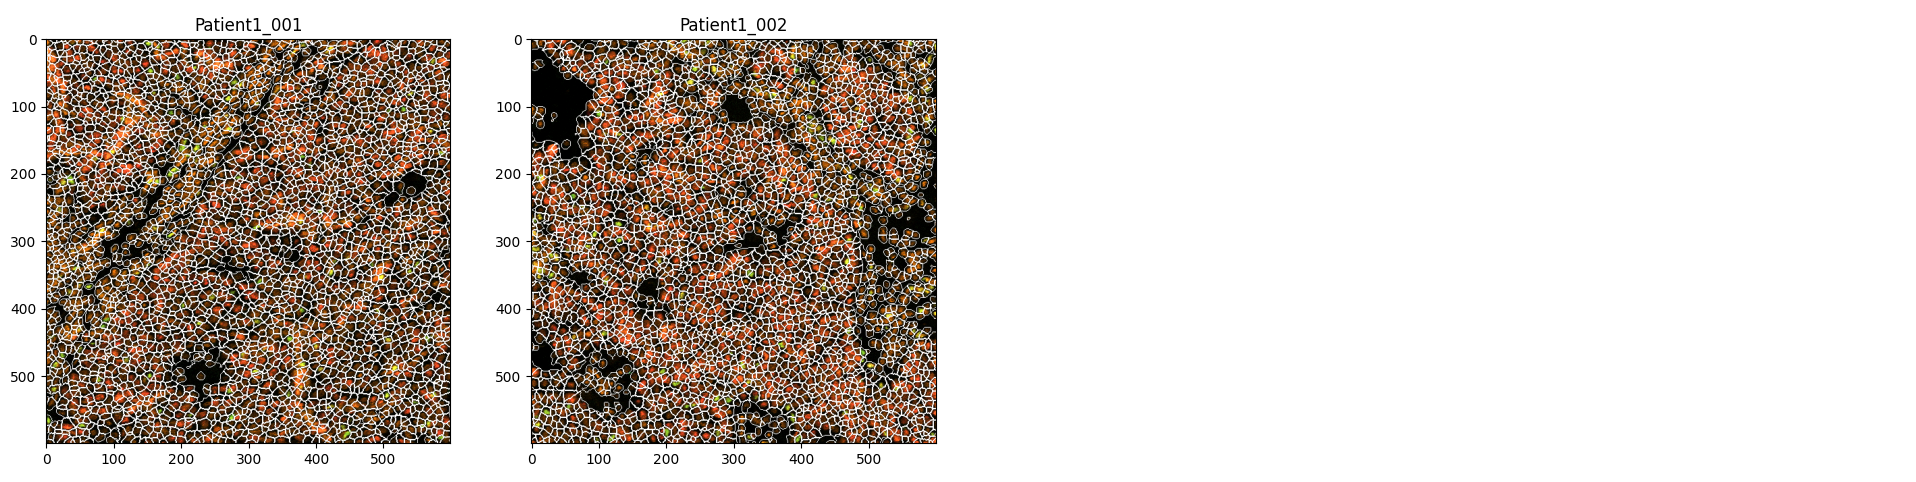

In [ ]:
idx = [ i for i, c, in enumerate(imc.table.var.index.tolist()) if c in ['DNA1', 'FOXP3', 'Ki67']]
_= (imc
    .pp.get_images(['Patient1_001', 'Patient1_002'], label_func=lambda x: x.rstrip('_ilastik'))
    .pp.get_channels(idx)
    .pp.colorize(colors=['C2', 'C3', 'C1'])
    .pp.render_labels(label_func=lambda x: x + '_ilastik') # we need a better solution for that
    .pl.imshow(width=6, height=6)
)

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

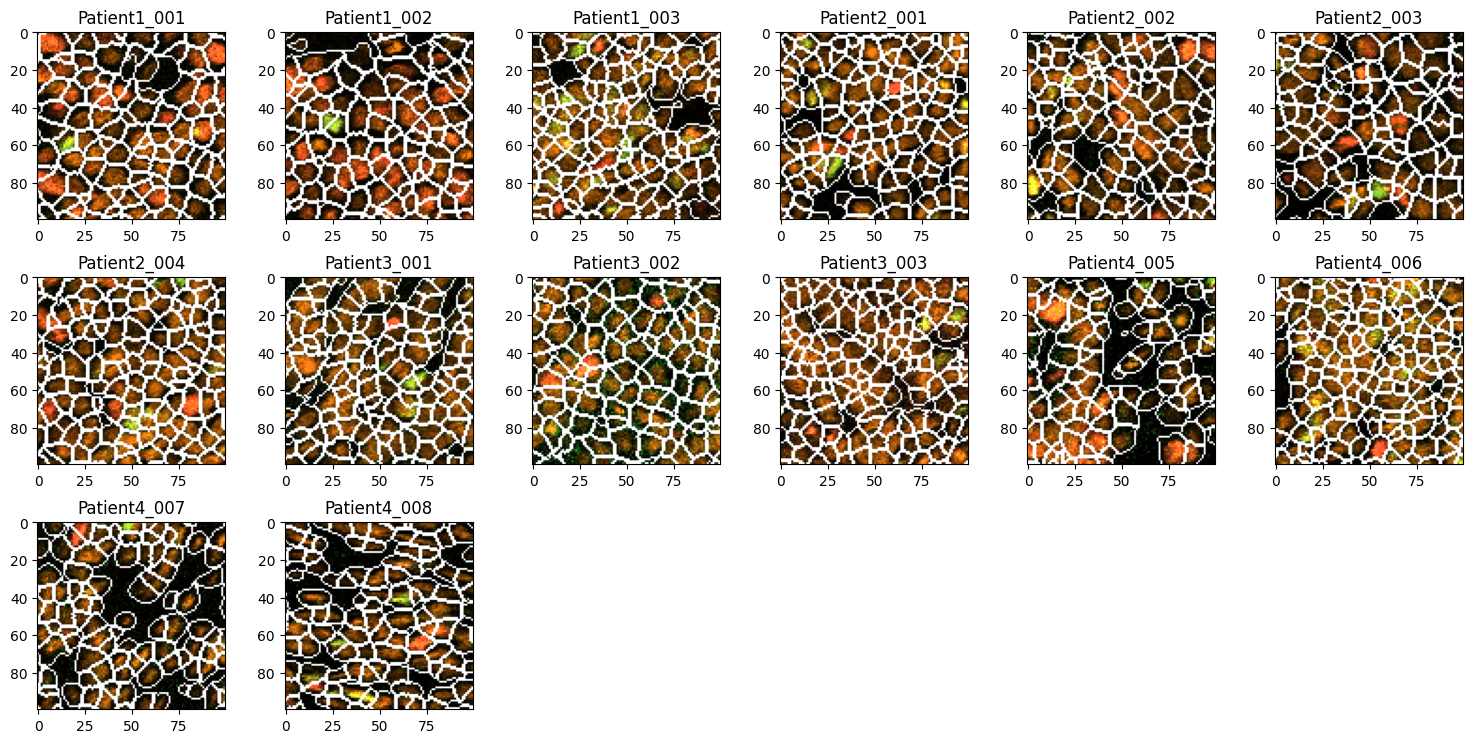

In [16]:
idx = [ i for i, c, in enumerate(imc.table.var.index.tolist()) if c in ['DNA1', 'FOXP3', 'Ki67']]
_= (imc
    .pp.get_channels(idx)
    .pp.get_bb(slice(300, 400), slice(300, 400))
    .pp.colorize(colors=['C2', 'C3', 'C1'])
    .pp.render_labels(label_func=lambda x: x + '_ilastik') # we need a better solution for that
    .pl.imshow(width=2.5, height=2.5, ncols=6)
)
plt.tight_layout()

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


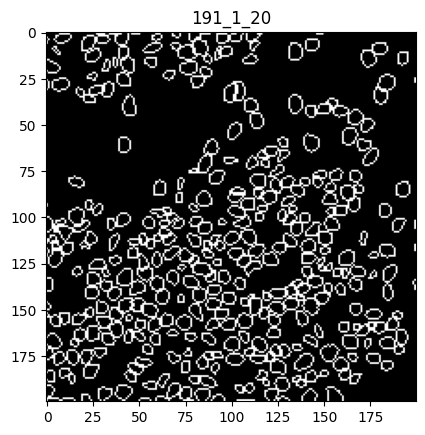

In [25]:
_ = (codex
     .pp.get_images(['191_1_20'])
     .pp.get_bb(slice(700, 900), slice(700, 900))
     .pp.get_channels([1])
     .pp.colorize(colors=['k'])
     .pp.render_labels()
     .pl.imshow(width=12, height=12)
)

INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


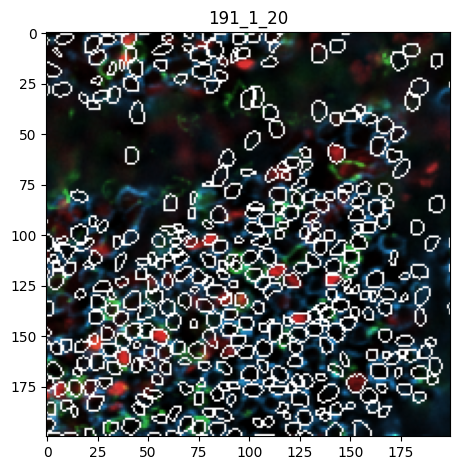

In [21]:

idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

_ = (codex
     .pp.get_images(['191_1_20'])
     .pp.get_bb(slice(700, 900), slice(700, 900))
     .pp.get_channels(idx)
     .pp.colorize(colors=['C3', 'C0', 'C2'])
     .pp.render_labels(color="Cluster", library_key="library_id", seg_cell_id="cell_id")
     .pl.imshow(width=12, height=12)
)
plt.tight_layout()

/g/huber/users/voehring/projects/2023-01-15_spatial_data/spatialdata-plot/src/spatialdata_plot/pl/basic.py:11: AccessorRegistrationWarning: registration of accessor <class 'spatialdata_plot.pl.basic.PlotAccessor'> under name 'pl' for type <class 'spatialdata._core._spatialdata.SpatialData'> is overriding a preexisting attribute with the same name.
  class PlotAccessor:


INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         
INFO     `dims` is set to: ('c', 'y', 'x')                                                                         


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


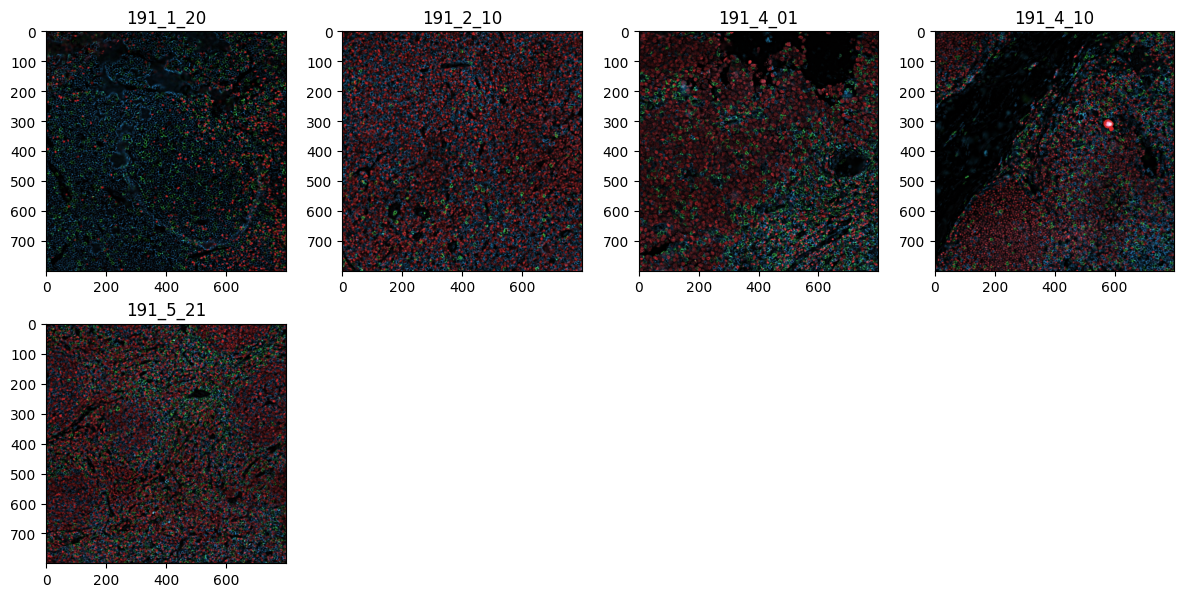

In [59]:
idx = [ i for i, c in enumerate(codex_channels) if c in ['CD4', 'CD8', 'PAX5'] ] 

_ = (codex
     .pp.get_images(['191_1_20', '191_4_10', '191_4_01', '191_2_10', '191_5_21'])
     .pp.get_bb(slice(700, 1500), slice(700, 1500))
     .pp.get_channels(idx)
     .pp.colorize(colors=['C3', 'C0', 'C2'])
     .pl.imshow(width=3, height=3)
)
plt.tight_layout()

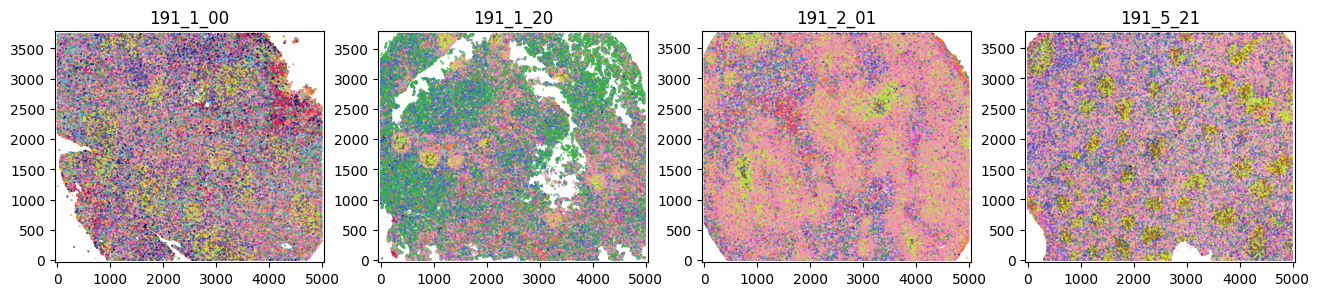

In [62]:
_ = (codex
 .pp.get_images(['191_1_00', '191_5_21', '191_2_01', '191_1_20'])
 .pl.scatter('x', 'y', color='color', s=.1)
)

In [64]:
subset = codex.pp.get_images('191_1_00')

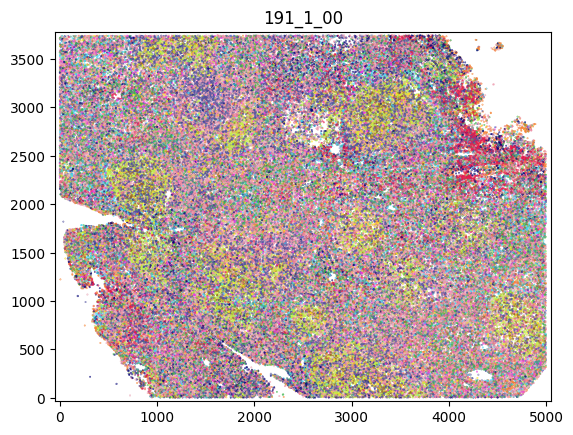

In [71]:
_ = subset.pl.scatter('x', 'y', s=.1, color='color')

INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
(1024, 1024, 4)
dict_keys([])
INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
(1024, 1024, 4)
dict_keys(['point16'])
INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
(1024, 1024, 4)
dict_keys(['point16', 'point23'])
INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


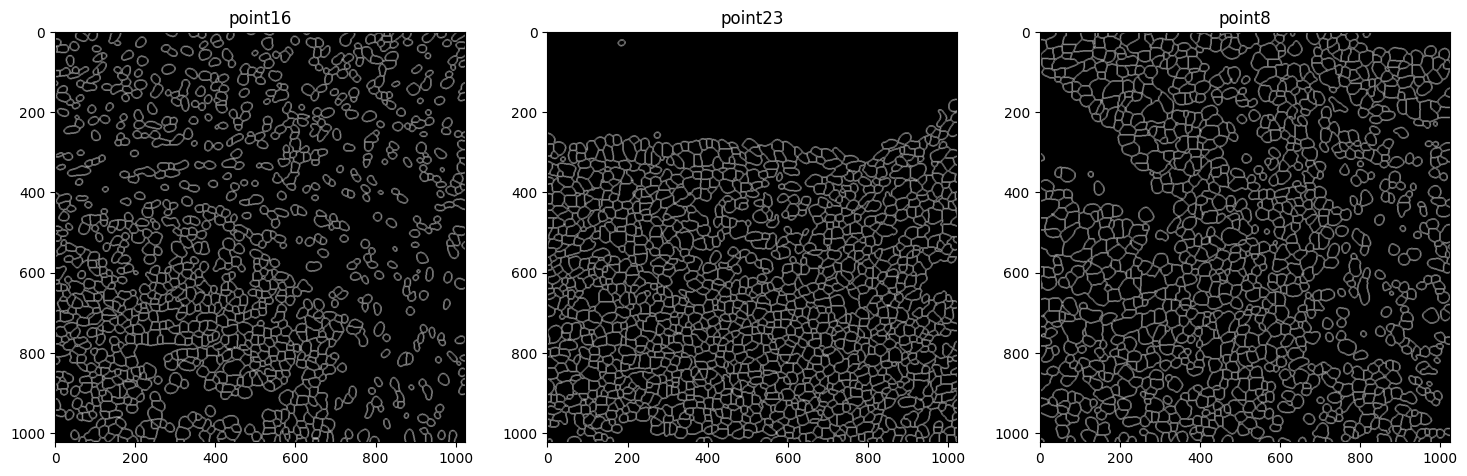

In [16]:
_ = mibi.pp.colorize(colors=['k', 'k', 'k']).pp.render_labels().pl.imshow(width=6, height=6)

In [141]:
mibi.pp.get_region_key()

'library_id'

In [142]:
mibi.pp.get_instance_key()

'cell_id'

In [143]:
visium.pp.get_instance_key()

'visium_spot_id'

In [138]:
visium.pp.get_region_key()

'annotating'

In [149]:
mibi.pp.get_bb([500, 600], [500, 600])

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 100, 100)
│     ├── 'point23': SpatialImage[cyx] (3, 100, 100)
│     └── 'point8': SpatialImage[cyx] (3, 100, 100)
├── Labels
│     ├── 'point16': SpatialImage[yx] (100, 100)
│     ├── 'point23': SpatialImage[yx] (100, 100)
│     └── 'point8': SpatialImage[yx] (100, 100)
└── Table
      └── AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial': AnnData (3309, 36)

In [152]:
mibi.pp.get_images(['point16'])

SpatialData object with:
├── Images
│     └── 'point16': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     └── 'point16': SpatialImage[yx] (1024, 1024)
└── Table
      └── View of AnnData object with n_obs × n_vars = 1023 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial': AnnData (1023, 36)

In [150]:
mibi.tl.label_property('centroid', )

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 1024, 1024)
│     ├── 'point23': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point8': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point16': SpatialImage[yx] (1024, 1024)
│     ├── 'point23': SpatialImage[yx] (1024, 1024)
│     └── 'point8': SpatialImage[yx] (1024, 1024)
└── Table
      └── AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial', 'label_props': AnnData (3309, 36)

In [140]:
m1 = mibi.tl.label_property('centroid')

In [133]:
m1.table[(m1.table.obsm['label_props']['x'] > 50) & (m1.table.obsm['label_props']['x'] < 100)]

View of AnnData object with n_obs × n_vars = 148 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial', 'label_props'

In [42]:
mibi.table.uns['spatialdata_attrs']['instance_key']

'cell_id'

In [58]:
mibi.table.obs

row_num  point  cell_id       X1  center_rowcoord  center_colcoord  \
9376-1     9479      8        2  65222.0             37.0              6.0   
9377-1     9480      8        4  65224.0            314.0              3.0   
9378-1     9481      8        5  65225.0            407.0              6.0   
9379-1     9482      8        6  65226.0            439.0             20.0   
9380-1     9483      8        7  65227.0            479.0              6.0   
...         ...    ...      ...      ...              ...              ...   
4270-0     4322     23     1479  61793.0            519.0           1018.0   
4271-0     4323     23     1480  61794.0            929.0           1018.0   
4272-0     4324     23     1481  61795.0            999.0           1019.0   
4273-0     4325     23     1482  61796.0            322.0           1018.0   
4274-0     4326     23     1483  61797.0            785.0           1019.0   

        cell_size   category donor        Cluster batch       library_id  
9376-1      474.0  carcinoma  90de     Epithelial     1   /labels/point8  
9377-1      126.0  carcinoma  90de     Epithelial     1   /labels/point8  
9378-1      398.0  carcinoma  90de     Epithelial     1   /labels/point8  
9379-1     1749.0  carcinoma  90de     Epithelial     1   /labels/point8  
9380-1      407.0  carcinoma  90de      Imm_other     1   /labels/point8  
...           ...        ...   ...            ...   ...              ...  
4270-0      125.0  carcinoma  21d7      Tcell_CD4     0  /labels/point23  
4271-0      190.0  carcinoma  21d7      Imm_other     0  /labels/point23  
4272-0      173.0  carcinoma  21d7      Imm_other     0  /labels/point23  
4273-0      181.0  carcinoma  21d7  Myeloid_CD11c     0  /labels/point23  
4274-0      178.0  carcinoma  21d7      Tcell_CD4     0  /labels/point23  

[3309 rows x 12 columns]

In [99]:
mibi.table.obsm['label_props']

library_id  cell_id  area
index                                 
9376-1   /labels/point8        2   474
9377-1   /labels/point8        4   126
9378-1   /labels/point8        5   398
9379-1   /labels/point8        6  1749
9380-1   /labels/point8        7   407
...                 ...      ...   ...
4270-0  /labels/point23     1479   125
4271-0  /labels/point23     1480   190
4272-0  /labels/point23     1481   173
4273-0  /labels/point23     1482   181
4274-0  /labels/point23     1483   178

[3309 rows x 3 columns]

In [101]:
test = mibi.tl.label_property('area')

/g/huber/users/voehring/projects/2023-01-15_spatial_data/spatialdata-plot/src/spatialdata_plot/tl/basic.py:10: AccessorRegistrationWarning: registration of accessor <class 'spatialdata_plot.tl.basic.ToolsAccessor'> under name 'tl' for type <class 'spatialdata._core._spatialdata.SpatialData'> is overriding a preexisting attribute with the same name.
  class ToolsAccessor:


In [105]:
test.table.obsm['label_props']

library_id  cell_id  area
index                                 
9376-1   /labels/point8        2   474
9377-1   /labels/point8        4   126
9378-1   /labels/point8        5   398
9379-1   /labels/point8        6  1749
9380-1   /labels/point8        7   407
...                 ...      ...   ...
4270-0  /labels/point23     1479   125
4271-0  /labels/point23     1480   190
4272-0  /labels/point23     1481   173
4273-0  /labels/point23     1482   181
4274-0  /labels/point23     1483   178

[3309 rows x 3 columns]

In [106]:
test

SpatialData object with:
├── Images
│     ├── 'point16': SpatialImage[cyx] (3, 1024, 1024)
│     ├── 'point23': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point8': SpatialImage[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point16': SpatialImage[yx] (1024, 1024)
│     ├── 'point23': SpatialImage[yx] (1024, 1024)
│     └── 'point8': SpatialImage[yx] (1024, 1024)
└── Table
      └── AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    uns: 'spatialdata_attrs'
    obsm: 'X_scanorama', 'X_umap', 'spatial', 'property', 'label_props': AnnData (3309, 36)

In [76]:
dd = mibi.table.obs[['library_id', 'cell_id']].reset_index().merge(test, on=['library_id', 'cell_id'], how='left').set_index('index') # .columns.to_flat_index()


library_id  cell_id  area
index                                 
9376-1   /labels/point8        2   474
9377-1   /labels/point8        4   126
9378-1   /labels/point8        5   398
9379-1   /labels/point8        6  1749
9380-1   /labels/point8        7   407
...                 ...      ...   ...
4270-0  /labels/point23     1479   125
4271-0  /labels/point23     1480   190
4272-0  /labels/point23     1481   173
4273-0  /labels/point23     1482   181
4274-0  /labels/point23     1483   178

[3309 rows x 3 columns]

In [88]:
mibi.table.obsm['property'] = dd

In [90]:
mibi.table.obsm['property']

library_id  cell_id  area
index                                 
9376-1   /labels/point8        2   474
9377-1   /labels/point8        4   126
9378-1   /labels/point8        5   398
9379-1   /labels/point8        6  1749
9380-1   /labels/point8        7   407
...                 ...      ...   ...
4270-0  /labels/point23     1479   125
4271-0  /labels/point23     1480   190
4272-0  /labels/point23     1481   173
4273-0  /labels/point23     1482   181
4274-0  /labels/point23     1483   178

[3309 rows x 3 columns]

In [82]:
dd.columns = dd.columns.to_flat_index()

In [83]:
dd

library_id  cell_id  area
index                                 
9376-1   /labels/point8        2   474
9377-1   /labels/point8        4   126
9378-1   /labels/point8        5   398
9379-1   /labels/point8        6  1749
9380-1   /labels/point8        7   407
...                 ...      ...   ...
4270-0  /labels/point23     1479   125
4271-0  /labels/point23     1480   190
4272-0  /labels/point23     1481   173
4273-0  /labels/point23     1482   181
4274-0  /labels/point23     1483   178

[3309 rows x 3 columns]

In [69]:
mibi.table.obs

row_num  point  cell_id       X1  center_rowcoord  center_colcoord  \
9376-1     9479      8        2  65222.0             37.0              6.0   
9377-1     9480      8        4  65224.0            314.0              3.0   
9378-1     9481      8        5  65225.0            407.0              6.0   
9379-1     9482      8        6  65226.0            439.0             20.0   
9380-1     9483      8        7  65227.0            479.0              6.0   
...         ...    ...      ...      ...              ...              ...   
4270-0     4322     23     1479  61793.0            519.0           1018.0   
4271-0     4323     23     1480  61794.0            929.0           1018.0   
4272-0     4324     23     1481  61795.0            999.0           1019.0   
4273-0     4325     23     1482  61796.0            322.0           1018.0   
4274-0     4326     23     1483  61797.0            785.0           1019.0   

        cell_size   category donor        Cluster batch       library_id  
9376-1      474.0  carcinoma  90de     Epithelial     1   /labels/point8  
9377-1      126.0  carcinoma  90de     Epithelial     1   /labels/point8  
9378-1      398.0  carcinoma  90de     Epithelial     1   /labels/point8  
9379-1     1749.0  carcinoma  90de     Epithelial     1   /labels/point8  
9380-1      407.0  carcinoma  90de      Imm_other     1   /labels/point8  
...           ...        ...   ...            ...   ...              ...  
4270-0      125.0  carcinoma  21d7      Tcell_CD4     0  /labels/point23  
4271-0      190.0  carcinoma  21d7      Imm_other     0  /labels/point23  
4272-0      173.0  carcinoma  21d7      Imm_other     0  /labels/point23  
4273-0      181.0  carcinoma  21d7  Myeloid_CD11c     0  /labels/point23  
4274-0      178.0  carcinoma  21d7      Tcell_CD4     0  /labels/point23  

[3309 rows x 12 columns]

In [26]:
mibi.table.uns['']

OverloadedDict, wrapping:
	{'spatialdata_attrs': {'instance_key': 'cell_id', 'region': ['/labels/point8', '/labels/point16', '/labels/point23'], 'region_key': 'library_id'}}
With overloaded keys:
	['neighbors'].

In [23]:
mibi.table.obs[mibi.pp.get_region_key()]

9376-1     /labels/point8
9377-1     /labels/point8
9378-1     /labels/point8
9379-1     /labels/point8
9380-1     /labels/point8
               ...       
4270-0    /labels/point23
4271-0    /labels/point23
4272-0    /labels/point23
4273-0    /labels/point23
4274-0    /labels/point23
Name: library_id, Length: 3309, dtype: category
Categories (3, object): ['/labels/point16', '/labels/point23', '/labels/point8']

In [24]:
mibi.table.obs

row_num  point  cell_id       X1  center_rowcoord  center_colcoord  \
9376-1     9479      8        2  65222.0             37.0              6.0   
9377-1     9480      8        4  65224.0            314.0              3.0   
9378-1     9481      8        5  65225.0            407.0              6.0   
9379-1     9482      8        6  65226.0            439.0             20.0   
9380-1     9483      8        7  65227.0            479.0              6.0   
...         ...    ...      ...      ...              ...              ...   
4270-0     4322     23     1479  61793.0            519.0           1018.0   
4271-0     4323     23     1480  61794.0            929.0           1018.0   
4272-0     4324     23     1481  61795.0            999.0           1019.0   
4273-0     4325     23     1482  61796.0            322.0           1018.0   
4274-0     4326     23     1483  61797.0            785.0           1019.0   

        cell_size   category donor        Cluster batch       library_id  
9376-1      474.0  carcinoma  90de     Epithelial     1   /labels/point8  
9377-1      126.0  carcinoma  90de     Epithelial     1   /labels/point8  
9378-1      398.0  carcinoma  90de     Epithelial     1   /labels/point8  
9379-1     1749.0  carcinoma  90de     Epithelial     1   /labels/point8  
9380-1      407.0  carcinoma  90de      Imm_other     1   /labels/point8  
...           ...        ...   ...            ...   ...              ...  
4270-0      125.0  carcinoma  21d7      Tcell_CD4     0  /labels/point23  
4271-0      190.0  carcinoma  21d7      Imm_other     0  /labels/point23  
4272-0      173.0  carcinoma  21d7      Imm_other     0  /labels/point23  
4273-0      181.0  carcinoma  21d7  Myeloid_CD11c     0  /labels/point23  
4274-0      178.0  carcinoma  21d7      Tcell_CD4     0  /labels/point23  

[3309 rows x 12 columns]

INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


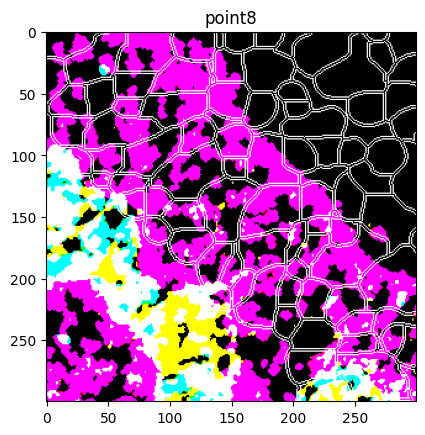

In [10]:
_ = mibi.pp.get_images('point8').pp.get_bb([0,300], [0,300]).pp.render_labels().pl.imshow()